In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

palette=sns.color_palette('magma')
sns.set(palette=palette)

In [5]:
data = pd.read_excel("../../Preprocessing/data_clean.xlsx", index_col=0)

data.head()

,userName,review,Sentimen,review_tokenize,review_normalized,review_stemmed,review_stopwords,review_clean
0,Della Nis94,waktu blm di upgrade ataupun udah upgrade sama...,0,"['waktu', 'blm', 'di', 'upgrade', 'ataupun', '...","['waktu', 'belum', 'di', 'upgrade', 'ataupun',...","['waktu', 'belum', 'di', 'upgrade', 'atau', 's...","['waktu', 'upgrade', 'upgrade', 'sama', 'ajama...",waktu upgrade upgrade sama ajamau daftar antri...
1,Jakarta Review,kirim kode verifikasi email gak masuk sampe s...,0,"['kirim', 'kode', 'verifikasi', 'email', 'gak'...","['kirim', 'kode', 'verifikasi', 'email', 'engg...","['kirim', 'kode', 'verifikasi', 'email', 'engg...","['kirim', 'kode', 'verifikasi', 'email', 'engg...",kirim kode verifikasi email enggak masuk engga...
2,Shasha Rose,saya minta verifikasi sampe kali gagal terus...,0,"['saya', 'minta', 'verifikasi', 'sampe', 'kali...","['saya', 'meminta', 'verifikasi', 'sampai', 'k...","['saya', 'minta', 'verifikasi', 'sampai', 'kal...","['minta', 'verifikasi', 'kali', 'gagal', 'nomo...",minta verifikasi kali gagal nomor ktpnama foto...
3,Kris Panji Mukti,tolong perbaiki masalah untuk pendaftaran vaks...,0,"['tolong', 'perbaiki', 'masalah', 'untuk', 'pe...","['tolong', 'perbaiki', 'masalah', 'untuk', 'pe...","['tolong', 'baik', 'masalah', 'untuk', 'daftar...","['baik', 'masalah', 'daftar', 'vaksin', 'nomor...",baik masalah daftar vaksin nomor ktp nama sesu...
4,Dwi Wiharti,saya sudah daftar untuk vaksin booster moderna...,0,"['saya', 'sudah', 'daftar', 'untuk', 'vaksin',...","['saya', 'sudah', 'daftar', 'untuk', 'vaksin',...","['saya', 'sudah', 'daftar', 'untuk', 'vaksin',...","['daftar', 'vaksin', 'booster', 'moderna', 'la...",daftar vaksin booster moderna lalu aplikasi ja...


In [6]:
data['review_clean'] = data['review_clean'].astype(str)

In [7]:
print(data.dtypes)

userName             object
review               object
Sentimen              int64
review_tokenize      object
review_normalized    object
review_stemmed       object
review_stopwords     object
review_clean         object
dtype: object


# Analisis Data

In [8]:
# Menghitung jumlah data sentimen
data['Sentimen'].value_counts()

0    991
1    989
Name: Sentimen, dtype: int64

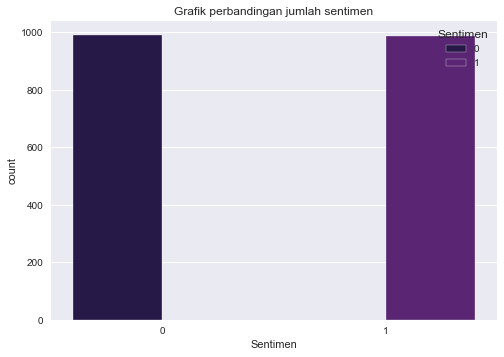

<Figure size 720x720 with 0 Axes>

In [9]:
# Visualisasi perbandingan jumlah source review

plt.style.use("seaborn")
plt.title("Grafik perbandingan jumlah sentimen")
sns.countplot(x="Sentimen", hue="Sentimen", data=data, palette=palette)
plt.figure(figsize=(10, 10))
plt.show()

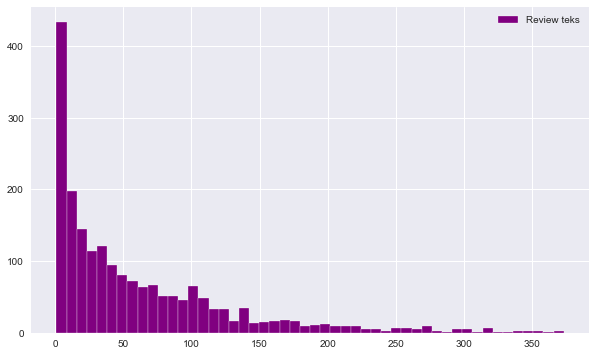

In [10]:
# Melihat panjang teks dalam data
length_data = data['review_clean'].str.len()
plt.style.use("seaborn")
plt.figure(figsize=(10, 6))
plt.hist(length_data, bins=50, label="Review teks", color="purple")
plt.legend()

In [11]:
#Visualisasi teks review dengan wordcloud
def word_cloud(words):
  word_cloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(words)
  plt.figure(figsize=(20,10))
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")

In [12]:
all_words = ' '.join([word for word in data["review_clean"]])

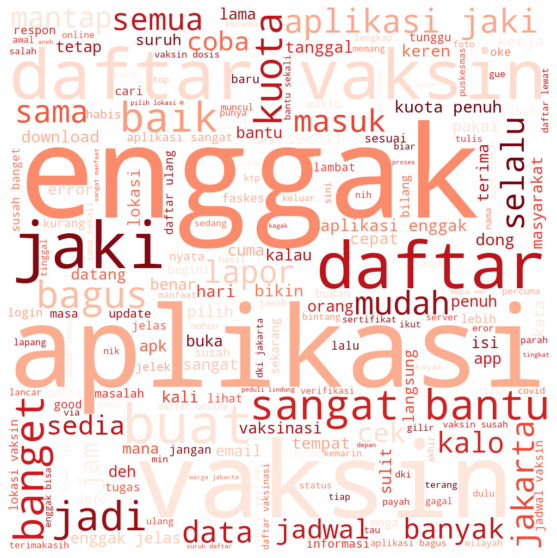

In [13]:
word_cloud(all_words)

# Split data training and testing

In [52]:
X = data['review_clean'].values
Y = data['Sentimen'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, 
random_state=0)

# Tokenization & Padding

In [53]:
# lakukan tokenisasi dan gunakan fungsi pad_sequence agar setiap sequence sama panjang 
tokenizer = Tokenizer(num_words=5000, oov_token='-')
tokenizer.fit_on_texts(x_train) 
tokenizer.fit_on_texts(x_test)
 
sekuens_latih = tokenizer.texts_to_sequences(x_train)
sekuens_test = tokenizer.texts_to_sequences(x_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [60]:
print(tokenizer.word_index)

{'-': 1, 'vaksin': 2, 'aplikasi': 3, 'enggak': 4, 'daftar': 5, 'jaki': 6, 'sangat': 7, 'bantu': 8, 'bagus': 9, 'kuota': 10, 'buat': 11, 'penuh': 12, 'banget': 13, 'lokasi': 14, 'baik': 15, 'jakarta': 16, 'jadi': 17, 'lapor': 18, 'selalu': 19, 'semua': 20, 'jadwal': 21, 'mantap': 22, 'sama': 23, 'masuk': 24, 'mudah': 25, 'susah': 26, 'data': 27, 'good': 28, 'jelas': 29, 'vaksinasi': 30, 'sekali': 31, 'banyak': 32, 'tanggal': 33, 'nan': 34, 'kalo': 35, 'pilih': 36, 'dki': 37, 'cek': 38, 'kali': 39, 'tempat': 40, 'terima': 41, 'datang': 42, 'jam': 43, 'cepat': 44, 'pakai': 45, 'coba': 46, 'sedia': 47, 'bikin': 48, 'sulit': 49, 'hari': 50, 'suruh': 51, 'lebih': 52, 'nik': 53, 'download': 54, 'keren': 55, 'dong': 56, 'sesuai': 57, 'email': 58, 'lewat': 59, 'ulang': 60, 'warga': 61, 'orang': 62, 'langsung': 63, 'benar': 64, 'tetap': 65, 'nama': 66, 'isi': 67, 'kata': 68, 'waktu': 69, 'online': 70, 'cuma': 71, 'kalau': 72, 'apk': 73, 'lama': 74, 'pertama': 75, 'deh': 76, 'mohon': 77, 'habis':

# TF-IDF

In [54]:
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [55]:
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

print(x_train.shape)
print(x_test.shape)

(1584, 2486)
(396, 2486)


In [35]:
# Untuk mengetahui panjang/jumldah data pada x_train , x_test, y_train, y_test
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1584, 2486) (1584,)
Test set: (396, 2486) (396,)


In [58]:
x_train

<1584x2486 sparse matrix of type '<class 'numpy.float64'>'
	with 13216 stored elements in Compressed Sparse Row format>

# Modeling

In [56]:
import tensorflow as tf
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=512),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 512)         2560000   
                                                                 
 lstm (LSTM)                 (None, 64)                147712    
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 16)                2064      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [57]:
num_epochs = 30
history = model.fit(padded_latih, y_train, epochs=num_epochs, 
                    validation_data=(padded_test, y_test), verbose=2)

Epoch 1/30
50/50 - 6s - loss: 0.5423 - accuracy: 0.7323 - val_loss: 0.2990 - val_accuracy: 0.8788 - 6s/epoch - 128ms/step
Epoch 2/30
50/50 - 4s - loss: 0.2362 - accuracy: 0.9242 - val_loss: 0.2161 - val_accuracy: 0.9318 - 4s/epoch - 89ms/step
Epoch 3/30
50/50 - 4s - loss: 0.0965 - accuracy: 0.9735 - val_loss: 0.2529 - val_accuracy: 0.9066 - 4s/epoch - 89ms/step
Epoch 4/30
50/50 - 4s - loss: 0.0573 - accuracy: 0.9867 - val_loss: 0.3195 - val_accuracy: 0.9293 - 4s/epoch - 89ms/step
Epoch 5/30
50/50 - 5s - loss: 0.0218 - accuracy: 0.9943 - val_loss: 0.4309 - val_accuracy: 0.9343 - 5s/epoch - 99ms/step
Epoch 6/30
50/50 - 5s - loss: 0.0258 - accuracy: 0.9943 - val_loss: 0.4101 - val_accuracy: 0.9394 - 5s/epoch - 90ms/step
Epoch 7/30
50/50 - 4s - loss: 0.0182 - accuracy: 0.9931 - val_loss: 0.4547 - val_accuracy: 0.9394 - 4s/epoch - 87ms/step
Epoch 8/30
50/50 - 5s - loss: 0.0140 - accuracy: 0.9968 - val_loss: 0.5239 - val_accuracy: 0.9343 - 5s/epoch - 106ms/step
Epoch 9/30
50/50 - 5s - loss: 

# Evaluasi

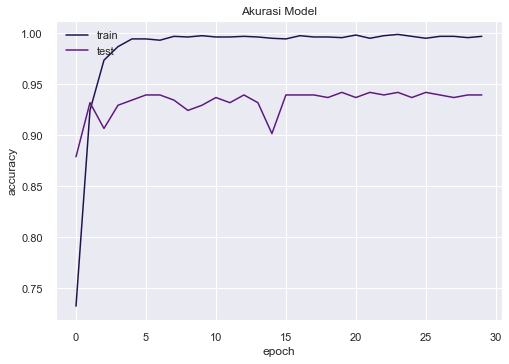

In [66]:
# plot akurasi dari model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

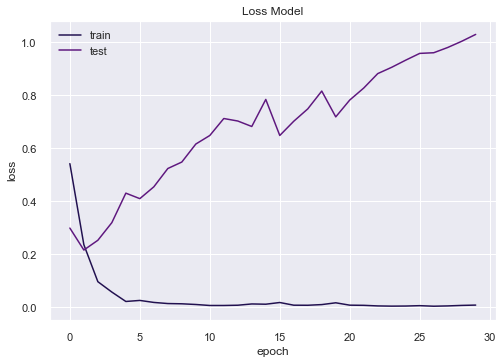

In [67]:
# plot loss dari model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()